<a href="https://colab.research.google.com/github/razorblazer98/faceRegconition/blob/master/CIFAR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPROCESS: 

In [0]:
import pickle
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2019-06-13 09:33:06--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.2’

cifar-10-python.tar 100%[===================>] 162.60M  93.5MB/s    in 1.7s    

2019-06-13 09:33:08 (93.5 MB/s) - ‘cifar-10-python.tar.gz.2’ saved [170498071/170498071]



In [0]:
!tar -xf cifar-10-python.tar.gz cifar-10-batches-py

In [0]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
!cd cifar-10-batches-py
%cd cifar-10-batches-py
!ls

/content/cifar-10-batches-py
batches.meta  data_batch_2  data_batch_4  my_CIFAR     test_batch
data_batch_1  data_batch_3  data_batch_5  readme.html


In [0]:
test=unpickle("data_batch_1")
label_mapping=unpickle("batches.meta")

test=unpickle("data_batch_1")
test2=unpickle("data_batch_2")
test3=unpickle("data_batch_3")
test4=unpickle("data_batch_5")
test5=unpickle("data_batch_5")


In [0]:
label_mapping=[x.decode("utf-8") for x in list(label_mapping.items())[1][1]]
labels=list(test.items())[1][1]
labels2=list(test2.items())[1][1]
labels3=list(test3.items())[1][1]
labels4=list(test4.items())[1][1]
labels5=list(test5.items())[1][1]

label_dict={x:y for x,y in zip(range(10),label_mapping)}


In [0]:
images=list(test.items())[2][1]
images2=list(test2.items())[2][1]
images3=list(test3.items())[2][1]
images4=list(test4.items())[2][1]
images5=list(test5.items())[2][1]



#Display Random Images

def disp_img():    
    
    plt.figure()

    for i in range(4):
        ind = random.randint(0,100)
        test_img=images[ind]
        test_img=test_img.reshape((3,32,32)).transpose(1, 2, 0)
        plt.subplot(2,2,i+1)
        plt.title(label_dict[labels[ind]])
        plt.imshow(test_img)

    plt.show()

    

In [9]:
len(labels)

10000

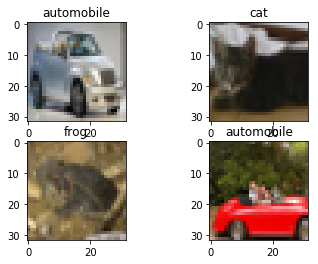

In [10]:
disp_img()

# CNN:

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import *
import numpy as np
tf.test.gpu_device_name()

'/device:GPU:0'

In [12]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())


model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
__________

In [0]:
X=images.reshape(10000,3,32,32).transpose(0,2,3,1)
X2=images2.reshape(10000,3,32,32).transpose(0,2,3,1)
X3=images3.reshape(10000,3,32,32).transpose(0,2,3,1)
X4=images4.reshape(10000,3,32,32).transpose(0,2,3,1)
X5=images5.reshape(10000,3,32,32).transpose(0,2,3,1)

Xtrain=np.concatenate((X,X2,X3,X4,X5))


#Ytrain=tf.one_hot(labels,depth=10)
Ytrain=labels


In [0]:
Ytrain.extend(labels2)
Ytrain.extend(labels3)
Ytrain.extend(labels4)
Ytrain.extend(labels5)



#Ytrain = np.random.rand(10000)
Ytrain= tf.keras.utils.to_categorical(Ytrain)

In [0]:
Xtrain=Xtrain/255

In [18]:
np.shape(Xtrain)

(50000, 32, 32, 3)

In [19]:
np.shape(Ytrain)

(50000, 10)

In [20]:
Ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
hist=model.fit(x=Xtrain,y=Ytrain,epochs=20,validation_split=0.2,batch_size=100)

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
40000/40000 [==============================] - 17s 434us/sample - loss: 1.7128 - acc: 0.3965 - val_loss: 1.3428 - val_acc: 0.5257
Epoch 2/20
40000/40000 [==============================] - 15s 373us/sample - loss: 1.3158 - acc: 0.5251 - val_loss: 1.1298 - val_acc: 0.5942
Epoch 3/20
40000/40000 [==============================] - 15s 377us/sample - loss: 1.1786 - acc: 0.5734 - val_loss: 1.0063 - val_acc: 0.6469
Epoch 4/20
40000/40000 [==============================] - 15s 381us/sample - loss: 1.0685 - acc: 0.6135 - val_loss: 0.9013 - val_acc: 0.6802
Epoch 5/20
40000/40000 [==============================] - 15s 376us/sample - loss: 0.9801 - acc: 0.6512 - val_loss: 0.8270 - val_acc: 0.7029
Epoch 6/20
40000/40000 [==============================] - 15s 376us/sample - loss: 0.9133 - acc: 0.6736 - val_loss: 0.7841 - val_acc: 0.7334
Epoch 7/20
40000/40000 [==============================] 

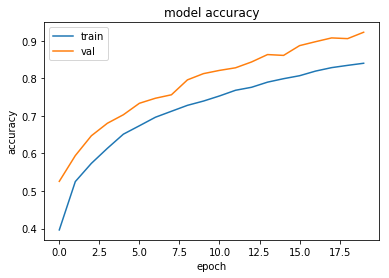

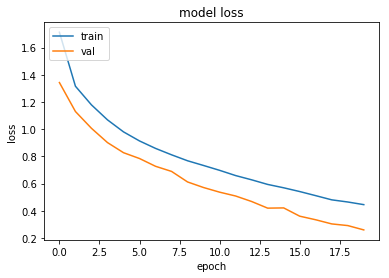

In [22]:
history=hist

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**EVALUATE!!!!**

In [0]:
tes =unpickle("test_batch")
Xtest=list(tes.items())[2][1]
Xtest=Xtest.reshape(10000,3,32,32).transpose(0,2,3,1)


In [24]:
Ytest=list(tes.items())[1][1]
len(Ytest)

10000

In [0]:
ypred=model.predict(Xtest)

In [26]:
Ytest=tf.keras.utils.to_categorical(Ytest)
Ytest
dummy=model.evaluate(x=Xtest,y=Ytest)

10000/10000 [==============================] - 1s 133us/sample - loss: 12.5905 - acc: 0.2089


In [27]:
label_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

**PLOT PREDICTIONS:**

In [44]:
'''    plt.figure()

    for i in range(4):
        ind = random.randint(0,100)
        test_img=Xtest[ind]
        plt.subplot(2,2,i+1)
        plt.title(label_dict[ypred[ind].argmax()]+", "+label_dict[Ytest[ind].argmax()])
        plt.imshow(test_img)

    plt.show()'''

'    plt.figure()\n\n    for i in range(4):\n        ind = random.randint(0,100)\n        test_img=Xtest[ind]\n        plt.subplot(2,2,i+1)\n        plt.title(label_dict[ypred[ind].argmax()]+", "+label_dict[Ytest[ind].argmax()])\n        plt.imshow(test_img)\n\n    plt.show()'

In [48]:
Xtrain[500].shape

(32, 32, 3)

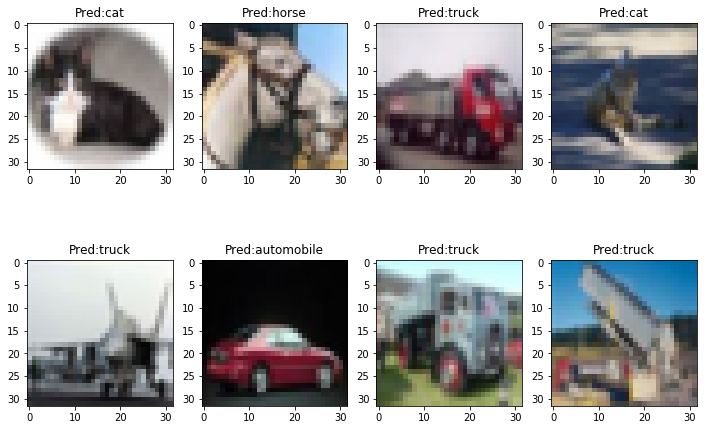

In [57]:
plt.figure(figsize=(12,8))

for i in range(8):
  ind=random.randint(0,10000)
  x=Xtrain[ind]
  plt.subplot(2,4,i+1)
  plt.imshow(x)
  
  x=np.expand_dims(x, axis=0)
  t=model.predict(x)
  
  plt.title("Pred:" + label_dict[t.argmax()])# + "\nActual:" + label_dict[Ytest[ind].argmax()])
